**Step 1: Load and Inspect the Data**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload file
uploaded = files.upload()

Saving boston_house_prices.csv to boston_house_prices.csv


In [ ]:
df = pd.read_csv('boston_house_prices.csv')
df

,location,sqft_living,bedrooms,bathrooms,has_garage,has_pool,has_garden,price
0,Suburb,1360,1,1.0,1,0,0,574405
1,Countryside,4272,1,1.5,0,1,1,1385525
2,Downtown,3592,3,1.0,0,1,1,931405
3,Countryside,966,3,1.0,1,1,0,364577
4,Downtown,4926,3,4.0,0,1,0,1173857
...,...,...,...,...,...,...,...,...
195,Countryside,4143,4,2.0,0,1,0,1276585
196,Countryside,2549,2,1.0,0,0,1,751333
197,Countryside,4223,3,4.0,0,0,1,1143328
198,Countryside,3608,5,4.0,0,1,0,1403545


**Step 2 : To check Null Values in Dataset**

In [ ]:
df.isnull().sum()

,0
location,0
sqft_living,0
bedrooms,0
bathrooms,0
has_garage,0
has_pool,0
has_garden,0
price,0


**Step 3 : Encode Categorical Features**

In [ ]:
df_encoded = pd.get_dummies(df, columns=["location"], drop_first=True)

**Step 4 : Show PairPlot for columns**

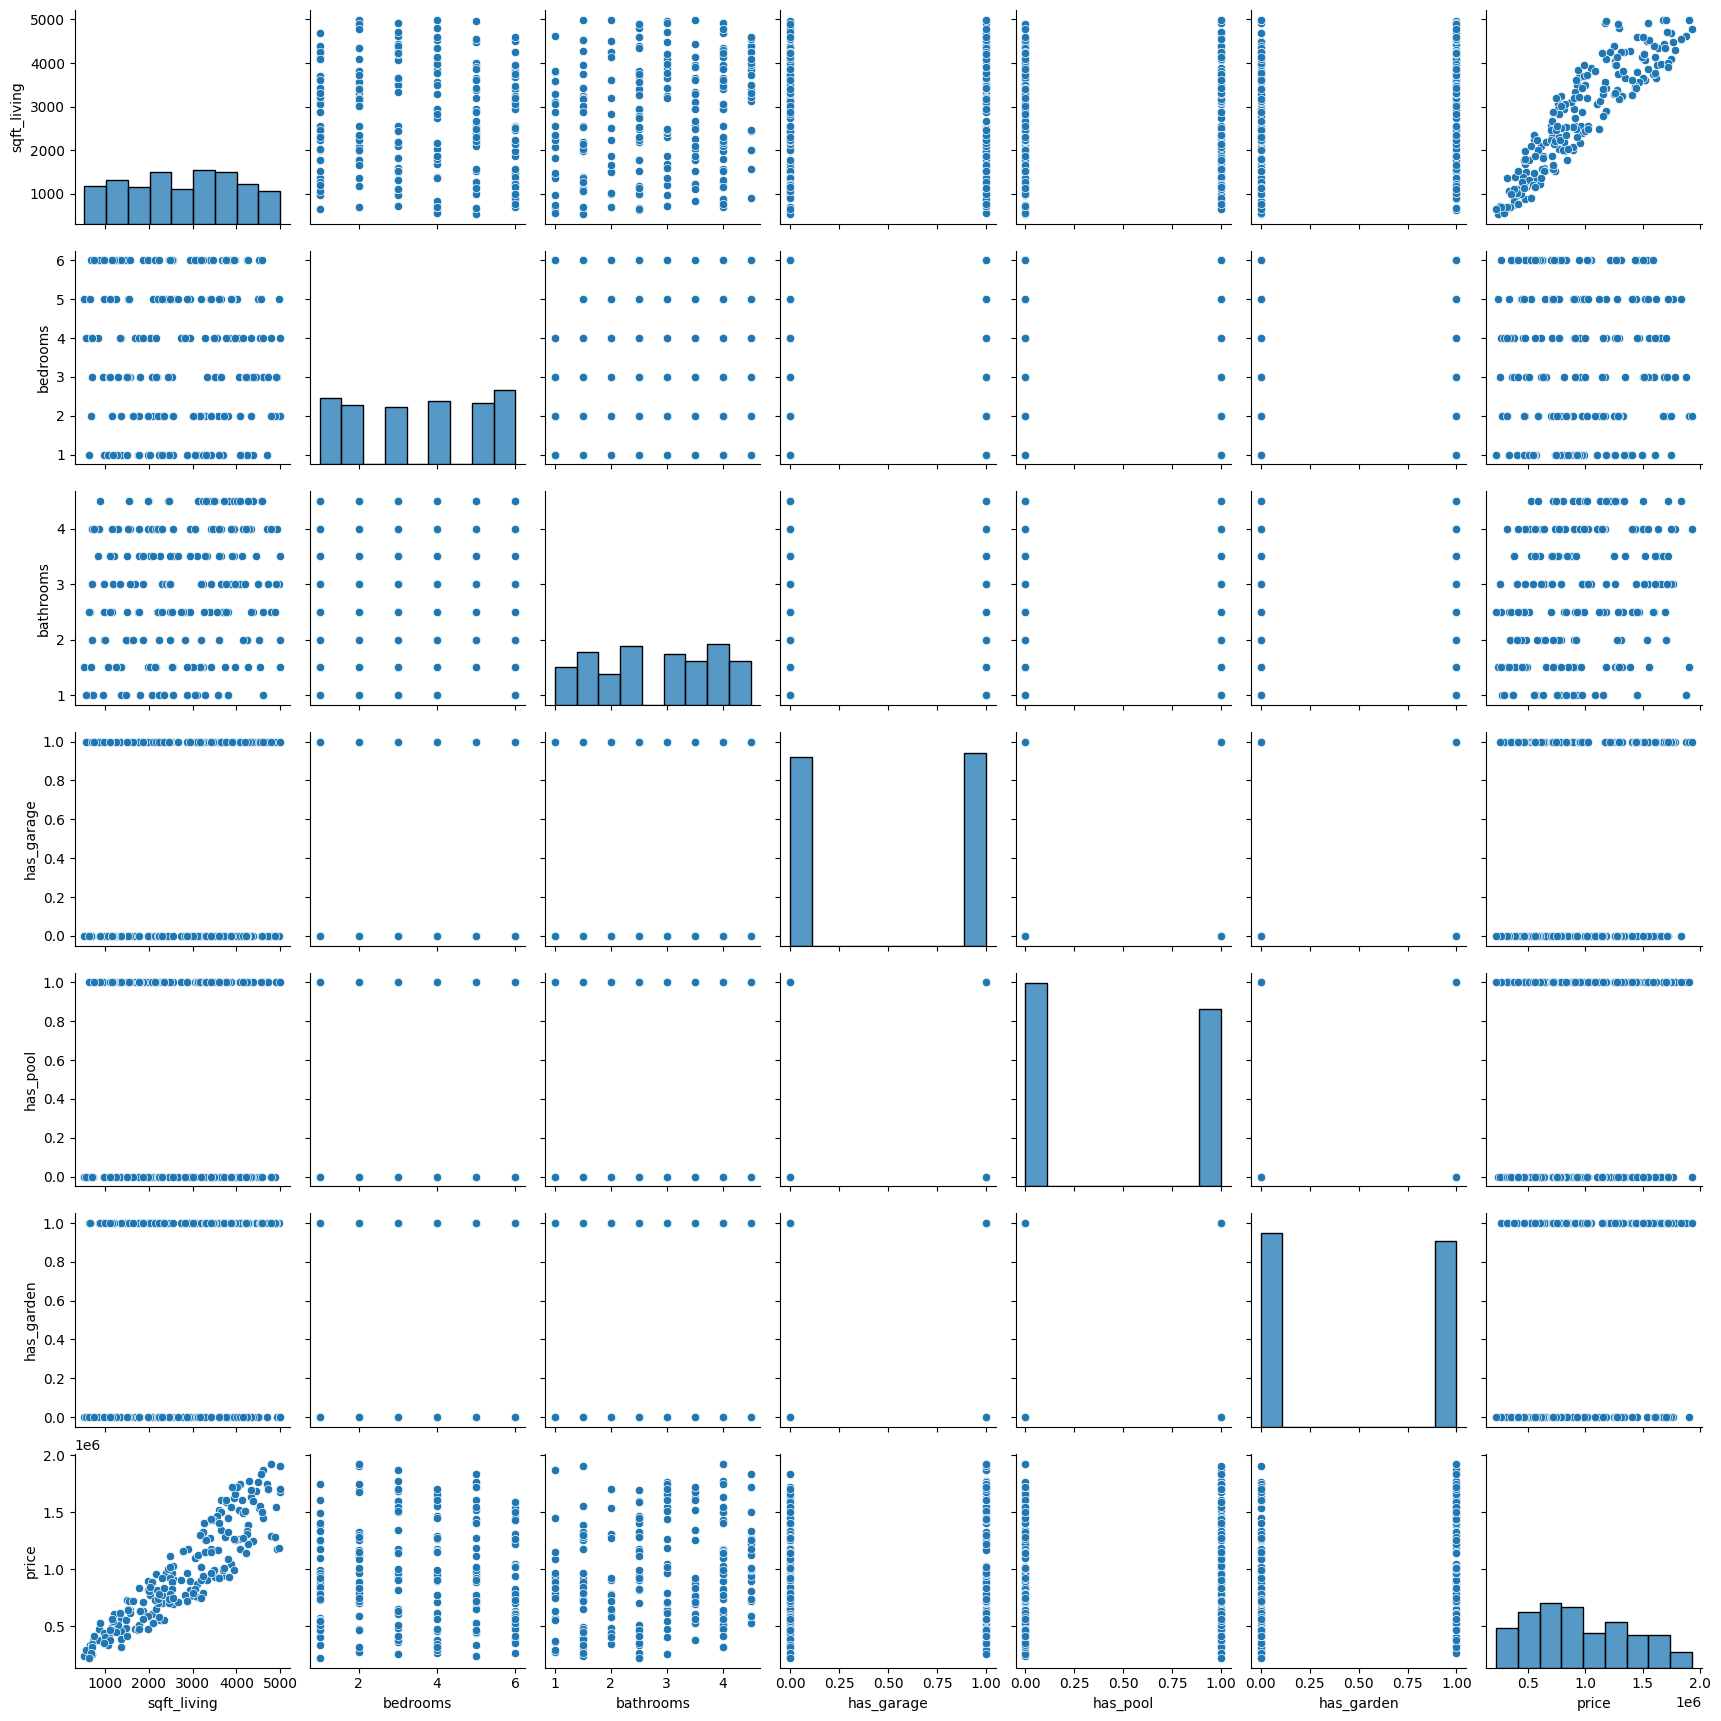

In [ ]:
sns.pairplot(data = df)
plt.show()

**Step 5 : Use LabelEncoderd for Location and display HeatMap**

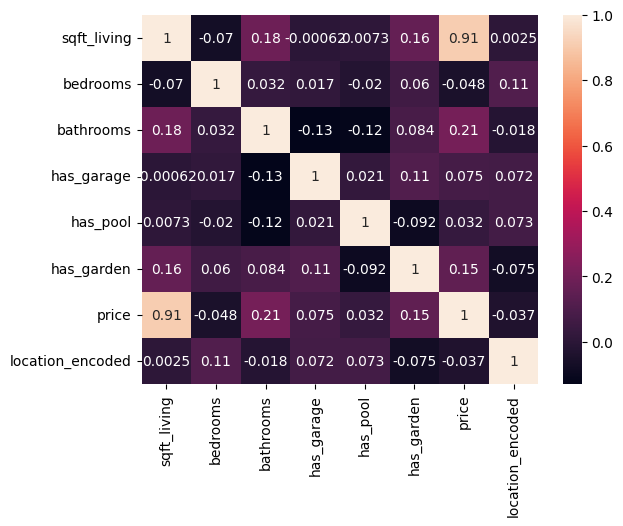

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['location_encoded'] = le.fit_transform(df['location'])

# Drop the original 'location' column
df = df.drop('location', axis=1)

# Now create the correlation matrix and plot the heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

**Step 6 : Split Features and Target**

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

**Step 7 : Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

**Step 8 : Train the Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Step 9 :  Evaluate the Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 41596152085.47829
R-squared: 0.7887524363584839


**Step 10 : Visualize Prediction vs Actual**

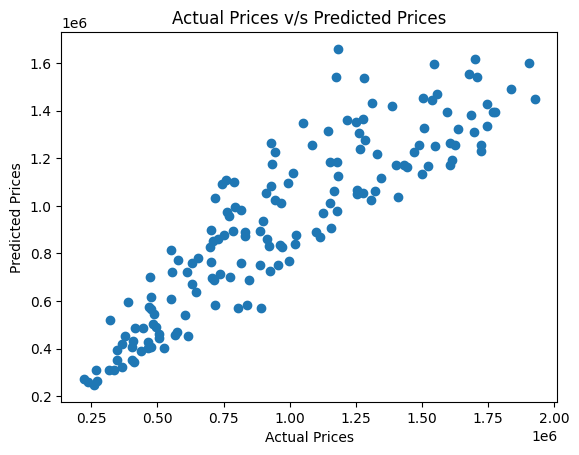

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

**Step 11 : Show Coef & Intercept**

In [ ]:
m = lr.coef_
c = lr.intercept_
print("Slope:", m)
print("Intercept:", c)

Slope: [   297.43586231  13916.46324263 -24551.04577514 -11674.70093352
  54333.2023744   42425.93203328   6992.7386676 ]
Intercept: 66836.27333562903
